In [1]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor

In [2]:
data = loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])

target = df['y']

df = df.drop('y', axis=1)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df.values, target, test_size = 0.3, random_state=0)



rr = Ridge(alpha=0.1)

mlp1 = MLPRegressor(hidden_layer_sizes=(10,10), activation='tanh', random_state=0, max_iter=500, early_stopping=True)
mlp2 = MLPRegressor(hidden_layer_sizes=(10,10), activation='tanh', random_state=0, max_iter=500, early_stopping=False)

In [4]:
#4
rr.fit(x_train, y_train)
mlp1.fit(x_train, y_train)
mlp2.fit(x_train, y_train)

y_pred_rr = rr.predict(x_test)
y_pred_mlp1 = mlp1.predict(x_test)
y_pred_mlp2 = mlp2.predict(x_test)

print("MAE(Ridge): ", metrics.mean_absolute_error(y_test, y_pred_rr))
print("MAE(MPL1): ", metrics.mean_absolute_error(y_test, y_pred_mlp1))
print("MAE(MPL2): ", metrics.mean_absolute_error(y_test, y_pred_mlp2))


MAE(Ridge):  0.162829976437694
MAE(MPL1):  0.0680414073796843
MAE(MPL2):  0.0978071820387748


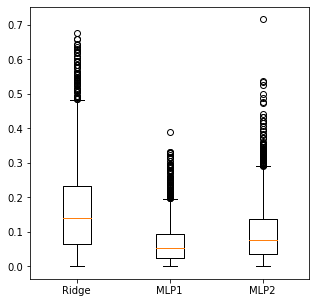

In [5]:
#5.1
plt.figure(figsize=(5, 5))
boxplot = plt.boxplot([abs(y_test - y_pred_rr), abs(y_test - y_pred_mlp1), abs(y_test - y_pred_mlp2)], \
    labels=['Ridge', 'MLP1', 'MLP2'])

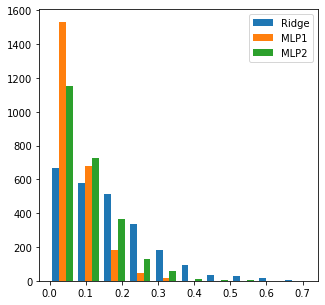

In [8]:
#5.2
plt.figure(figsize=(5, 5))

hist = plt.hist([abs(y_test - y_pred_rr), abs(y_test - y_pred_mlp1), abs(y_test - y_pred_mlp2)])
plt.legend(labels=['Ridge', 'MLP1', 'MLP2'])


In [7]:
# 6)
print("MLP1 iterations: ", mlp1.n_iter_)
print("MLP2 iterations: ", mlp2.n_iter_)

MLP1 iterations:  452
MLP2 iterations:  77
